# Theorical Questions

#### Q. Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?

<b>A. </b>Linear Regression is responsible to solve regression problems. Regression in the terms of continous dependent variable is identified using a given set of individual variables. On the other hand, Logistic regression is responsible to perform the classification of data in a particular class of data.<br />

Other points are as follows: <br />
a) As regression might produce probabilities that could be less than 0, or even bigger than 1, logistic regression was introduced.<br />
b) In linear regression, the outcome (dependent variable) is continuous. It can have any one of an infinite number of possible values. Whereas, in logistic regression, the outcome (dependent variable) has only a limited number of possible values.<br />
c) Linear regression is used when your response variable is continuous. For instance, weight, height, number of hours, etc. whereas, Logistic regression is used when the response variable is categorical in nature. For instance, yes/no, true/false, red/green/blue, 1st/2nd/3rd/4th, etc.<br />

#### Q. What's a decision tree and how it is different to a logistic regression model?

<b>A.</b> Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation. 

source: https://scikit-learn.org/stable/modules/tree.html

Difference:
a) Decision Trees bisect the space into smaller and smaller regions, whereas Logistic Regression fits a single line to divide the space exactly into two.
b) When a tree consists of a large number of nodes, it can require a significant amount of mental effort to comprehend all the splits that lead up to a particular prediction. In contrast, a Logistic Regression model is simply a list of coefficients.
c) Decision Trees handle skewed classes when compared to Logical Regression.
d) Logistic Regression does not handle missing values; we need to impute those values by mean, mode, and median. If there are many missing values, then imputing those may not be a good idea, since we are changing the distribution of data by imputing mean everywhere. Decision Trees works with missing values.

#### Q. We discussed three variants of decision tree (single-tree) in our lecture, what are their differences?

<b>A.</b> ID3 (Iterative Dichotomiser 3) was developed in 1986 by Ross Quinlan. The algorithm creates a multiway tree, finding for each node (i.e. in a greedy manner) the categorical feature that will yield the largest information gain for categorical targets. Trees are grown to their maximum size and then a pruning step is usually applied to improve the ability of the tree to generalise to unseen data.

C4.5 is the successor to ID3 and removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals. C4.5 converts the trained trees (i.e. the output of the ID3 algorithm) into sets of if-then rules. This accuracy of each rule is then evaluated to determine the order in which they should be applied. Pruning is done by removing a rule’s precondition if the accuracy of the rule improves without it.

CART (Classification and Regression Trees) is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yields the largest information gain at each node.

#### Q. What is the difference between the random forest model, and a bagging ensemble of CART models?

<b>A.</b> The fundamental difference is that in Random forests, only a subset of features are selected at random out of the total and the best split feature from the subset is used to split each node in a tree, unlike in bagging where all features are considered for splitting a node.

The concept of bagging is to train a bunch of unpruned decision trees on different random subsets of the training data, sampling with replacement. Whereas, the concept of random forests is to build multiple decision trees and aggregate them to get an accurate result with as little bias as possible.

Bagging improves the accuracy and stability of the machine learning models using ensemble learning and reduces the complexity of overfitting models. While, the random forest algorithm is very robust against overfitting and it is good with unbalanced and missing data.

#### Q. How is gradient boosting different to boosting (adaboost)?

<b>A.</b> Adaptive Boosting or AdaBoost minimizes the exponential loss function that can make the algorithm sensitive to outliers. With Gradient Boosting, any differentiable loss function can be utilised and hence is more robust to outliers than AdaBoost. AdaBoost is the first designed boosting algorithm with a particular loss function versus Gradient Boosting which is a generic algorithm that helps in searching the approximate solutions making it more flexible than AdaBoost. AdaBoost is used for classification whereas Gradient Boosting can be used for both classification and regression problems. Gradient Boosting identifies the shortcomings of the existing weak learners by gradients and AdaBoost identifies by high-weight data points.

source: https://analyticsindiamag.com/adaboost-vs-gradient-boosting-a-comparison-of-leading-boosting-algorithms/

# Tinder.com: Speed Dating Match Prediction

In [229]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from pprint import pprint
import seaborn as sns

In [230]:
data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data.shape

(5909, 192)

# Exploratory Data Analysis: Understanding and tuning data for missing values

In [213]:
data.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828


<AxesSubplot:>

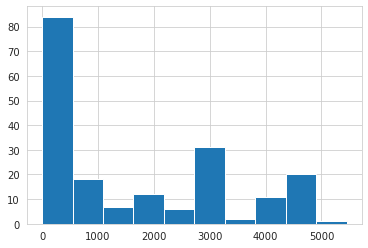

In [214]:
data.isnull().sum().hist()

<AxesSubplot:>

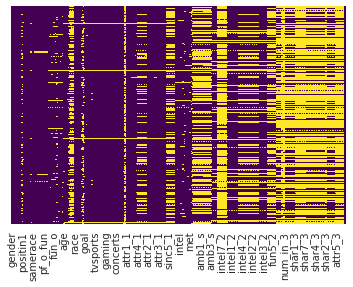

In [215]:
# Check the amount of missing values in the features.
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Remove columns with more than 50% missing values 

In [231]:
# Since there are too many columns and most of the columns have more than 50% of 
# values as NaN I have removed those columns.
def missing(data):
  print (round((data.isnull().sum() * 100/ len(data)),2).sort_values(ascending=False))

missing(data)

num_in_3    92.22
numdat_3    82.06
expnum      78.30
amb7_2      76.48
sinc7_2     76.48
            ...  
order        0.00
partner      0.00
match        0.00
samerace     0.00
gender       0.00
Length: 192, dtype: float64


In [232]:
def rmissingvaluecol(dff, threshold):
    l = []
    l = list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index)) >= threshold))].columns, 1).columns.values) 
    print("# Columns having more than %s percent missing values: "%threshold, (dff.shape[1] - len(l)))
    print("Columns:\n", list(set(list((dff.columns.values))) - set(l)))
    return l

existing_columns = rmissingvaluecol(data,50) # Here threshold is 80% which means we are going to drop columns having more than 80% of missing values. 

# Columns having more than 50 percent missing values:  59
Columns:
 ['num_in_3', 'sinc7_2', 'attr4_3', 'intel1_s', 'sinc7_3', 'intel7_2', 'attr1_s', 'sinc1_3', 'shar4_3', 'fun7_3', 'fun1_3', 'amb3_s', 'shar2_3', 'fun3_s', 'intel4_3', 'intel5_3', 'fun7_2', 'amb4_3', 'date_3', 'intel7_3', 'you_call', 'attr3_3', 'amb1_s', 'amb7_2', 'intel2_3', 'sinc1_s', 'amb3_3', 'sinc3_3', 'sinc2_3', 'attr1_3', 'amb5_3', 'amb2_3', 'attr3_s', 'numdat_3', 'sinc5_3', 'expnum', 'sinc4_3', 'fun4_3', 'attr5_3', 'fun3_3', 'intel1_3', 'shar7_3', 'intel3_s', 'shar1_3', 'fun5_3', 'attr7_2', 'attr7_3', 'shar1_s', 'shar7_2', 'amb7_3', 'intel3_3', 'amb1_3', 'mn_sat', 'tuition', 'fun1_s', 'attr2_3', 'sinc3_s', 'them_cal', 'fun2_3']


In [233]:
data = data[existing_columns]
data.columns.unique()

Index(['gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1',
       'order', 'partner', 'pid',
       ...
       'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'attr5_2', 'sinc5_2',
       'intel5_2', 'fun5_2', 'amb5_2', 'id'],
      dtype='object', length=133)

### Finding co-relation and trying to understand the data

<AxesSubplot:xlabel='match', ylabel='count'>

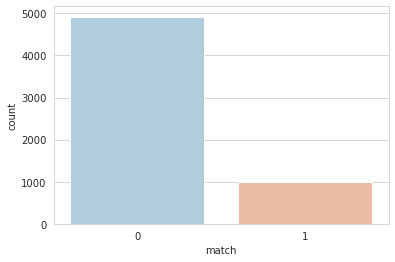

In [184]:
sns.set_style('whitegrid')
sns.countplot(x='match', data=data,palette='RdBu_r')

<AxesSubplot:xlabel='match', ylabel='count'>

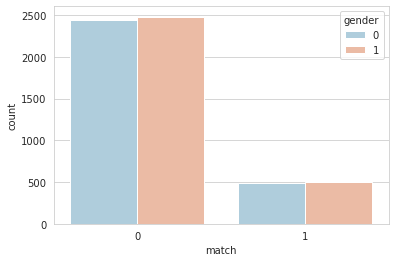

In [185]:
# Trying to figure out whether same number of males and females have a match or there is a
# difference between the match details of the males and females.
sns.set_style('whitegrid')
sns.countplot(x='match', hue='gender', data=data,palette='RdBu_r')

<AxesSubplot:xlabel='match', ylabel='count'>

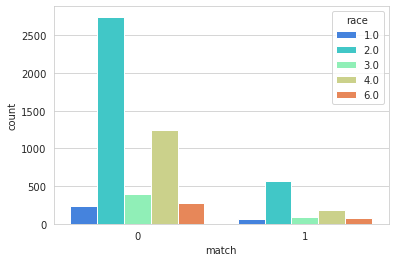

In [186]:
# Trying to understand if race has an impact on the match
sns.set_style('whitegrid')
sns.countplot(x='match', hue='race', data=data,palette='rainbow')

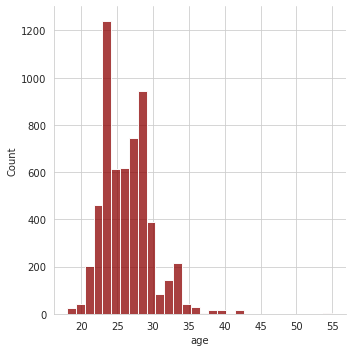

In [187]:
sns.displot(data['age'].dropna(),kde=False,color='darkred',bins=30)

<AxesSubplot:xlabel='race', ylabel='age'>

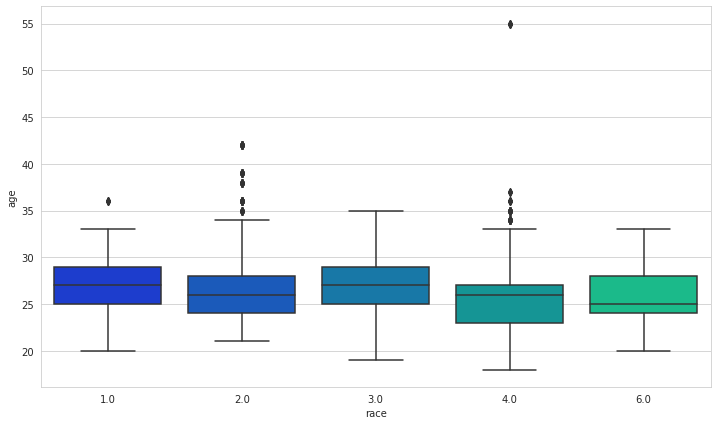

In [188]:
# To find the correct for a column, we can use this technique
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
sns.boxplot(x='race', y='age', data=data, palette='winter')

<AxesSubplot:>

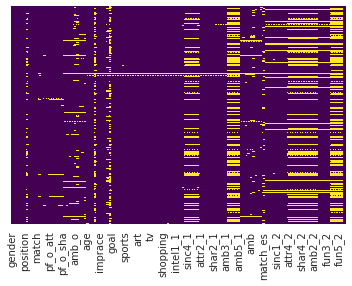

In [189]:
# Check the amount of missing values in the features.
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

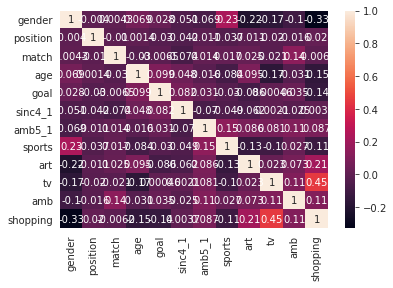

In [191]:
# Looking for highly co-related data and then deleting the rows respectively.
import seaborn as sns
sns.heatmap(data=data[['gender', 'position', 'match', 'age', 'goal', 'sinc4_1', 'amb5_1', 'sports', 'art', 'tv', 'amb', 'shopping']].corr(), annot=True)

In [199]:
data.drop(['shopping'], axis=1)

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,10.0,10.0,9.0,10.0,10.0,9.0,10.0,9.0,10.0,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,7.0,7.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,9.0,9.0,8.0,10.0,7.0,9.0,8.0,7.0,9.0,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,8.0,9.0,9.0,8.0,7.0,7.0,8.0,8.0,8.0,4828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,0,1,2,9,20,2,2.0,18,1,214.0,...,10.0,10.0,8.0,10.0,NaN,NaN,NaN,NaN,NaN,3390
5905,1,24,2,9,20,19,15.0,5,6,199.0,...,9.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,4130
5906,0,13,2,11,21,5,5.0,3,18,290.0,...,10.0,9.0,8.0,4.0,6.0,10.0,8.0,9.0,7.0,1178
5907,1,10,2,7,16,6,14.0,9,10,151.0,...,7.0,9.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,5016


# Downgrading scikit-learn

In [234]:
# down-grade scikit-learn (latest not greatest :) 
!pip install -Ivq scikit-learn==0.23.2

# if you haven't installed xgboost on your system, uncomment the line below
!pip install xgboostcolumns
# if you haven't installed bayesian-optimization on your system, uncomment the line below
!pip install scikit-optimize

Defaulting to user installation because normal site-packages is not writeable
Processing /home/rabajaj/.cache/pip/wheels/5e/74/24/7e235ccf01765c0daa089c98cc823e9dc1383da5fe0ed7e224/scikit_learn-0.23.2-cp39-cp39-linux_x86_64.whl
  Using cached scipy-1.7.1-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.whl (28.5 MB)
  Using cached numpy-1.21.2-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.8 MB)
  Using cached threadpoolctl-3.0.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement xgboostcolumns (from versions: none)
ERROR: No matching distribution found for xgboostcolumns
Defaulting to user installation because normal site-packages is not writeable


In [235]:
# Splitting features from the training dataset.
x = data.drop('match', axis=1)
features_numeric = list(x.select_dtypes(include=['float64']))
features_categorical = list(x.select_dtypes(include=['object']))
y = data['match']

In [236]:
# check the categorical data.
print(features_categorical)
print(data['undergra'].isnull());
print(data['undergra'].head());

['field', 'undergra', 'from', 'zipcode', 'income', 'career']
0       False
1        True
2       False
3        True
4       False
        ...  
5904     True
5905     True
5906    False
5907     True
5908    False
Name: undergra, Length: 5909, dtype: bool
0                    University of Michigan-Ann Arbor
1                                                 NaN
2    Rizvi College of Architecture, Bombay University
3                                                 NaN
4                                     Harvard College
Name: undergra, dtype: object


# Trial 1: Random Forest Hyperparameter Tuning using GridSearchCV

In [206]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost.sklearn import XGBClassifier

np.random.seed(0)


transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())]
)

transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# Column transformer is used when we have features in our dataframe that need different preprossesing.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
    ]
)

# Pipeline is for chaining steps together.
# So here, it will take the following things:
# a) It will perform the prepossing steps and
# b) It will also build the model.
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           RandomForestClassifier(),
        )
    ]
)

# `__` denotes attribute 
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean'],
    'my_classifier__n_estimators': [20, 30, 40],    # this is for random forest
    'my_classifier__max_depth':[10, 20, 30]         # this is for random forest
}

grid_search = GridSearchCV(
    full_pipline, param_grid, cv=3, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(x, y)

print('best score {}'.format(grid_search.best_score_))
print('best params {}'.format(grid_search.best_params_))

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  27 out of  27 | elapsed:    6.7s finished


best score 0.8427243790074354
best params {'my_classifier__max_depth': 10, 'my_classifier__n_estimators': 40, 'preprocessor__num__imputer__strategy': 'mean'}


In [175]:
print('all the cv scores')
pd.DataFrame(grid_search.cv_results_)

all the cv scores


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_my_classifier__max_depth,param_my_classifier__n_estimators,param_preprocessor__num__imputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.209882,0.010555,0.032715,0.000571,10,20,mean,"{'my_classifier__max_depth': 10, 'my_classifie...",0.833962,0.832051,0.831330,0.832448,0.001111,2
1,0.254083,0.007064,0.036169,0.002127,10,30,mean,"{'my_classifier__max_depth': 10, 'my_classifie...",0.846969,0.821195,0.821227,0.829797,0.012142,3
2,0.306856,0.007986,0.039351,0.000692,10,40,mean,"{'my_classifier__max_depth': 10, 'my_classifie...",0.844357,0.841380,0.832254,0.839330,0.005149,1
3,0.345017,0.006051,0.034691,0.000941,20,20,mean,"{'my_classifier__max_depth': 20, 'my_classifie...",0.814612,0.807499,0.805658,0.809256,0.003861,7
4,0.483280,0.007732,0.040025,0.001729,20,30,mean,"{'my_classifier__max_depth': 20, 'my_classifie...",0.833531,0.821197,0.809081,0.821270,0.009981,5
5,0.618761,0.023092,0.043646,0.001281,20,40,mean,"{'my_classifier__max_depth': 20, 'my_classifie...",0.825646,0.831077,0.815418,0.824047,0.006492,4
6,0.398792,0.008269,0.034450,0.000378,30,20,mean,"{'my_classifier__max_depth': 30, 'my_classifie...",0.807738,0.802437,0.800414,0.803530,0.003088,9
7,0.551415,0.011831,0.039368,0.000266,30,30,mean,"{'my_classifier__max_depth': 30, 'my_classifie...",0.805031,0.808983,0.809094,0.807703,0.001890,8
8,0.692019,0.011268,0.039838,0.001210,30,40,mean,"{'my_classifier__max_depth': 30, 'my_classifie...",0.824908,0.824087,0.809675,0.819557,0.006995,6


# Trail 2: Random Forest Hyperparameter Tuning using RandomisedSearchCv

In [207]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(0)

transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())]
)

transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# Column transformer is used when we have features in our dataframe that need different preprossesing.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
    ]
)

# Pipeline is for chaining steps together.
# So here, it will take the following things:
# a) It will perform the prepossing steps and
# b) It will also build the model.
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           RandomForestClassifier(),
        )
    ]
)


# `__` denotes attribute 
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # 'my_classifier__n_estimators': [20, 30],  # this is for xgboost
    # 'my_classifier__max_depth':[10, 20]       # this is for xgboost
    'my_classifier__max_features': ['auto', 'sqrt'],
    'my_classifier__n_estimators': [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)],    # this is for random forest
    'my_classifier__max_depth':[10, 20, 30],         # this is for random forest
    'my_classifier__min_samples_split': [2, 5],
    'my_classifier__min_samples_leaf': [1,2],
    'my_classifier__bootstrap': [True, False]
}

# The cross-validation is goign to run cross validation on the entire pipeline. In another words,
# we are not cross validating a model, we are cross validating a pipeline of steps that include 
# preprossing of data and model building.
# This cross-validation will perform a 3 fold split on the data and then run the pipeline.
random_search =  RandomizedSearchCV(
    full_pipline, param_grid, cv=3, verbose=1, n_jobs=2)

# random_search is a pipeline object, which when fit will run the preprocessign and the model building.
random_search.fit(x, y)

print('best score {}'.format(random_search.best_score_))
print('best params {}'.format(random_search.best_params_))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    9.8s finished


best score 0.854628553063173
best params {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 80, 'my_classifier__min_samples_split': 2, 'my_classifier__min_samples_leaf': 2, 'my_classifier__max_features': 'auto', 'my_classifier__max_depth': 30, 'my_classifier__bootstrap': False}


In [10]:
# prepare submission:
submission = pd.DataFrame()
submission['id'] = data_test['id']
submission['match'] = random_search.predict_proba(data_test)[:,1]
submission.to_csv('sample_submission_walkthrough.csv', index=False)
submission

,id,match
0,934,0.087975
1,6539,0.292826
2,6757,0.176067
3,2275,0.135005
4,1052,0.098441
...,...,...
2464,7982,0.153384
2465,7299,0.257146
2466,1818,0.089325
2467,937,0.108337


# Trial 3: Hyperparameter Optimization (BayesSearchCV)

In [11]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.svm import SVC

# SVC has a class_weight attribute for unbalanced data
SVC_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_svc', SVC(class_weight='balanced'))
    ]
)

# define ranges for bayes search
bayes_search = BayesSearchCV(
    SVC_pipline,
    {
        'my_svc__C': Real(1e-6, 1e+6, prior='log-uniform'),
        'my_svc__gamma': Real(1e-6, 1e+1, prior='log-uniform'),
        'my_svc__degree': Integer(1,8),
        'my_svc__kernel': Categorical(['linear', 'poly', 'rbf']),
    },
    n_iter=3,
    random_state=0,
    verbose=1,
    cv=3,
)

bayes_search.fit(x, y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   25.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   25.2s finished


BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('preprocessor',
                                         ColumnTransformer(transformers=[('num',
                                                                          Pipeline(steps=[('imputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('scaler',
                                                                                           StandardScaler())]),
                                                                          ['positin1',
                                                                           'pid',
                                                                           'int_corr',
                                                                           'age_o',
                                                             

In [12]:
print('best score {}'.format(bayes_search.best_score_))
print('best score {}'.format(bayes_search.best_params_))

best score 0.8307666271788797
best score OrderedDict([('my_svc__C', 0.0012602593949011189), ('my_svc__degree', 8), ('my_svc__gamma', 2.285959941576884), ('my_svc__kernel', 'poly')])


In [13]:
print('all the cv scores')
pd.DataFrame(bayes_search.cv_results_)

all the cv scores


,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_my_svc__C,param_my_svc__degree,param_my_svc__gamma,param_my_svc__kernel,params
0,0.827411,0.824873,0.826816,0.826367,0.001084,2,6.617986,1.034061,2.007205,0.061935,2.352719,6,0.022854,poly,"{'my_svc__C': 2.352718564818733, 'my_svc__degr..."
1,0.835025,0.828426,0.828847,0.830767,0.003017,1,6.920570,0.801309,2.038833,0.075988,0.001260,8,2.285960,poly,"{'my_svc__C': 0.0012602593949011189, 'my_svc__..."
2,0.793909,0.785279,0.790757,0.789981,0.003566,3,7.338736,0.251168,1.048019,0.019316,2.209535,1,0.000249,linear,"{'my_svc__C': 2.2095350994035026, 'my_svc__deg..."


# Trail 4: XGBoost Hyperparameter Optimization using RandomSearchCV

In [219]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBClassifier

np.random.seed(0)

transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())]
)

transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# Column transformer is used when we have features in our dataframe that need different preprossesing.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
    ]
)

# Pipeline is for chaining steps together.
# So here, it will take the following things:
# a) It will perform the prepossing steps and
# b) It will also build the model.
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           XGBClassifier(objective='binary:logistic', seed=1),
        )
    ]
)


# `__` denotes attribute 
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`
#  which is our xgb)
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean'],
    'my_classifier__learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
    'my_classifier__max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],    # this is for random forest
    'my_classifier__min_child_weight':[ 1, 3, 5, 7 ],         # this is for random forest
    'my_classifier__gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    'my_classifier__colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7 ],
}

# The cross-validation is goign to run cross validation on the entire pipeline. In another words,
# we are not cross validating a model, we are cross validating a pipeline of steps that include 
# preprossing of data and model building.
# This cross-validation will perform a 3 fold split on the data and then run the pipeline.
random_search =  RandomizedSearchCV(
    full_pipline, param_grid, cv=3, verbose=1, n_jobs=2)

# random_search is a pipeline object, which when fit will run the preprocessign and the model building.
random_search.fit(x, y)

print('best score {}'.format(random_search.best_score_))
print('best params {}'.format(random_search.best_params_))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:  2.7min finished
/home/rabajaj/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:03:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best score 0.8700291059647892
best params {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__min_child_weight': 7, 'my_classifier__max_depth': 3, 'my_classifier__learning_rate': 0.15, 'my_classifier__gamma': 0.4, 'my_classifier__colsample_bytree': 0.3}


In [221]:
# prepare submission:
submission = pd.DataFrame()
submission['id'] = data_test['id']
submission['match'] = random_search.predict_proba(data_test)[:,1]
submission.to_csv('sample_submission_walkthrough.csv', index=False)
submission

,id,match
0,934,0.055110
1,6539,0.333202
2,6757,0.283697
3,2275,0.034072
4,1052,0.011326
...,...,...
2464,7982,0.157508
2465,7299,0.457596
2466,1818,0.068127
2467,937,0.040846


# Trail 5 : Tuning the imputers for numeric and categorical data (trying out few permutations and combinations)

#### 5.1 Using KNNImputer for numberic data

In [227]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.impute import KNNImputer

np.random.seed(0)

transformer_numeric = Pipeline(
    steps=[
        ('imputer', KNNImputer(n_neighbors=3)),
        ('scaler', StandardScaler())]
)

transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse='False'))
    ]
)

# Column transformer is used when we have features in our dataframe that need different preprossesing.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
    ]
)

# Pipeline is for chaining steps together.
# So here, it will take the following things:
# a) It will perform the prepossing steps and
# b) It will also build the model.
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           XGBClassifier(objective='binary:logistic', seed=1),
        )
    ]
)

# `__` denotes attribute 
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`
#  which is our xgb)
param_grid = {
    'my_classifier__learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
    'my_classifier__max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
    'my_classifier__min_child_weight':[ 1, 3, 5, 7 ],
    'my_classifier__gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    'my_classifier__colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7 ],
}

# The cross-validation is goign to run cross validation on the entire pipeline. In another words,
# we are not cross validating a model, we are cross validating a pipeline of steps that include 
# preprossing of data and model building.
# This cross-validation will perform a 3 fold split on the data and then run the pipeline.
random_search =  RandomizedSearchCV(
    full_pipline, param_grid, cv=3, verbose=1, n_jobs=2)

# random_search is a pipeline object, which when fit will run the preprocessign and the model building. 
random_search.fit(x, y)

print('best score {}'.format(random_search.best_score_))
print('best params {}'.format(random_search.best_params_))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:  7.2min finished
/home/rabajaj/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:22:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best score 0.8656284078341193
best params {'my_classifier__min_child_weight': 3, 'my_classifier__max_depth': 5, 'my_classifier__learning_rate': 0.15, 'my_classifier__gamma': 0.0, 'my_classifier__colsample_bytree': 0.4}


#### 5.2 check for best preprocessor__num__imputer__strategy

In [238]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBClassifier

np.random.seed(0)

transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())]
)

transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# Column transformer is used when we have features in our dataframe that need different preprossesing.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
    ]
)

# Pipeline is for chaining steps together.
# So here, it will take the following things:
# a) It will perform the prepossing steps and
# b) It will also build the model.
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           XGBClassifier(objective='binary:logistic', seed=1),
        )
    ]
)


# `__` denotes attribute 
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`
#  which is our xgb)
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'my_classifier__learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
    'my_classifier__max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],    # this is for random forest
    'my_classifier__min_child_weight':[ 1, 3, 5, 7 ],         # this is for random forest
    'my_classifier__gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    'my_classifier__colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7 ],
}

# The cross-validation is goign to run cross validation on the entire pipeline. In another words,
# we are not cross validating a model, we are cross validating a pipeline of steps that include 
# preprossing of data and model building.
# This cross-validation will perform a 3 fold split on the data and then run the pipeline.
random_search =  RandomizedSearchCV(
    full_pipline, param_grid, cv=3, verbose=1, n_jobs=2)

# random_search is a pipeline object, which when fit will run the preprocessign and the model building.
random_search.fit(x, y)

print('best score {}'.format(random_search.best_score_))
print('best params {}'.format(random_search.best_params_))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:  2.7min finished
/home/rabajaj/.local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:58:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best score 0.8678287568994544
best params {'preprocessor__num__imputer__strategy': 'median', 'my_classifier__min_child_weight': 5, 'my_classifier__max_depth': 12, 'my_classifier__learning_rate': 0.1, 'my_classifier__gamma': 0.4, 'my_classifier__colsample_bytree': 0.3}


# Trial 6: Logistic Regression Hyperparameter Optimization using RandomSearchCV

In [254]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model  import LogisticRegression

np.random.seed(0)

transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())]
)

transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# Column transformer is used when we have features in our dataframe that need different preprossesing.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
    ]
)

# Pipeline is for chaining steps together.
# So here, it will take the following things:
# a) It will perform the prepossing steps and
# b) It will also build the model.
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
          LogisticRegression(),
        )
    ]
)


# `__` denotes attribute 
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`
#  which is our xgb)
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'my_classifier__penalty' : ['l2', 'none'],
    'my_classifier__C' : np.logspace(-4, 4, 20),
    'my_classifier__solver' : ['liblinear'],
}

# The cross-validation is goign to run cross validation on the entire pipeline. In another words,
# we are not cross validating a model, we are cross validating a pipeline of steps that include 
# preprossing of data and model building.
# This cross-validation will perform a 3 fold split on the data and then run the pipeline.
random_search =  RandomizedSearchCV(
    full_pipline, param_grid, cv=3, verbose=1, n_jobs=2)

# random_search is a pipeline object, which when fit will run the preprocessign and the model building.
random_search.fit(x, y)

print('best score {}'.format(random_search.best_score_))
print('best params {}'.format(random_search.best_params_))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:   13.9s finished


best score 0.8492125405717555
best params {'preprocessor__num__imputer__strategy': 'median', 'my_classifier__solver': 'liblinear', 'my_classifier__penalty': 'l2', 'my_classifier__C': 4.281332398719396}
